In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
train=pd.read_csv("/content/Train_aBjfeNk.csv")

In [ ]:
sub=pd.read_csv("/content/sample_submission_wyi0h0z.csv")

In [ ]:
test=pd.read_csv("/content/Test_LqhgPWU.csv")

In [ ]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
y=train.pop("Segmentation")

In [ ]:
data=pd.concat([train,test])

In [ ]:
sorted=data.sort_values("ID")

In [ ]:
data.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object

In [ ]:
(data.isnull().sum()/len(data))*100

ID                  0.000000
Gender              0.000000
Ever_Married        1.776531
Age                 0.000000
Graduated           0.953717
Profession          1.514727
Work_Experience    10.266480
Spending_Score      0.000000
Family_Size         4.188873
Var_1               1.009818
dtype: float64

# VISUALIZATION

In [ ]:
data.Ever_Married.isnull().sum()

190

In [ ]:
data.Ever_Married.value_counts()

Yes    6163
No     4342
Name: Ever_Married, dtype: int64

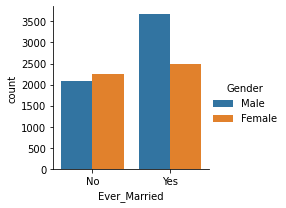

In [ ]:
sns.catplot(x='Ever_Married',data=data,kind='count',height=3,aspect=1,hue="Gender")


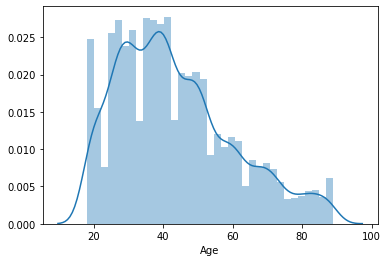

In [ ]:
sns.distplot(data.Age)

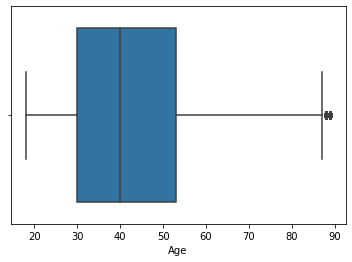

In [ ]:
sns.boxplot(train.Age)

In [ ]:
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [ ]:
(data["Work_Experience"]).value_counts()

1.0     3127
0.0     3087
9.0      613
8.0      612
2.0      373
4.0      346
3.0      337
5.0      270
6.0      265
7.0      256
14.0      66
11.0      64
10.0      64
12.0      60
13.0      57
Name: Work_Experience, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train["segment"]=le.fit_transform(train["Segmentation"])

In [ ]:
target=train["segment"]

# MEAN ENCODING

In [ ]:
Mean_encoded_subject = train.groupby(['Gender'])['segment'].mean().to_dict()
data['GEnder_enco'] =  data['Gender'].map(Mean_encoded_subject)

In [ ]:
Mean_encoded_subject = train.groupby(['Ever_Married'])['segment'].mean().to_dict()
data['everM_enco'] =  data['Ever_Married'].map(Mean_encoded_subject)

In [ ]:
Mean_encoded_subject = train.groupby(['Graduated'])['segment'].mean().to_dict()
data['Grad_enco'] =  data['Graduated'].map(Mean_encoded_subject)

In [ ]:
Mean_encoded_subject = train.groupby(['Profession'])['segment'].mean().to_dict()
data['Prof_enco'] =  data['Profession'].map(Mean_encoded_subject)

In [ ]:
Mean_encoded_subject = train.groupby(['Work_Experience'])['segment'].mean().to_dict()
data['WE_enco'] =  data['Work_Experience'].map(Mean_encoded_subject)

In [ ]:
Mean_encoded_subject = train.groupby(['Spending_Score'])['segment'].mean().to_dict()
data['Spending_Score_enco'] =  data['Spending_Score'].map(Mean_encoded_subject)

In [ ]:
Mean_encoded_subject = train.groupby(['Family_Size'])['segment'].mean().to_dict()
data['Family_Size_enco'] =  data['Family_Size'].map(Mean_encoded_subject)

In [ ]:
Mean_encoded_subject = train.groupby(['Var_1'])['segment'].mean().to_dict()
data['Var_1_enco'] =  data['Var_1'].map(Mean_encoded_subject)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
data["cat_var"]=le1.fit_transform(data["Spending_Score"])

In [ ]:
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,GEnder_enco,everM_enco,Grad_enco,Prof_enco,WE_enco,Spending_Score_enco,Family_Size_enco,Var_1_enco,cat_var
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,1.589314,1.855708,1.824950,2.500000,1.511470,1.666667,1.803481,1.556474,2
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,1.528896,1.351066,1.404187,1.240343,NaN,1.423506,1.663327,1.556474,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,1.528896,1.351066,1.404187,1.240343,1.511470,1.666667,1.245699,1.549255,2
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,1.589314,1.351066,1.404187,1.319422,1.550043,1.366776,1.376987,1.549255,1
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,1.528896,1.351066,1.404187,1.224447,NaN,1.366776,1.933962,1.549255,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,1.589314,1.855708,1.824950,2.500000,1.546414,1.666667,1.803481,1.549255,2
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,1.528896,1.855708,1.404187,1.513081,1.511470,1.666667,1.245699,1.549255,2
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,1.528896,1.855708,1.404187,1.224447,NaN,1.666667,1.376987,1.549255,2
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,1.589314,1.351066,1.404187,1.470785,1.511470,1.366776,1.911765,1.556474,1


# Train

In [ ]:

df=pd.get_dummies(data)
trainxx=df[:8068]
testxx=df[8068:]

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
scores = cross_val_score(xgb, trainxx,target, cv = 3, scoring = "accuracy")
scores.mean()

0.5387946118543444

In [ ]:
pd.DataFrame([trainxx.columns,xgb.feature_importances_])

,0,1,2,3,4,5,6,7,8,9,10,11
0,ID,Age,Work_Experience,GEnder_enco,everM_enco,Grad_enco,Prof_enco,WE_enco,Spending_Score_enco,Family_Size_enco,Var_1_enco,cat_var
1,0.0318194,0.176342,0.0275128,0.032577,0.0398927,0.136091,0.109939,0.0208014,0.213509,0.0500672,0.0339158,0.127533


In [ ]:
xgb.fit(trainxx,target)
pred=xgb.predict(testxx)
pred=le.inverse_transform(pred)
sub["Segmentation"]=pred

In [ ]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
scores = cross_val_score(lgb, trainxx,target, cv = 3, scoring = "accuracy")
scores.mean()

0.5348290778484835

In [ ]:
sub.to_csv("data9.csv",index=False)

In [ ]:
dt=data

In [ ]:
dt.drop(["Gender","Ever_Married","Graduated","Profession","Spending_Score","Family_Size","Var_1"],axis=1,inplace=True)

In [ ]:
trainxx=dt[:8068]
testxx=dt[8068:]

In [ ]:
data=pd.get_dummies(data)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df=imputer.fit_transform(data)

In [ ]:
trainxx=df[:8068]
testxx=df[8068:]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd=RandomForestClassifier()
scores = cross_val_score(rnd, trainxx,target, cv = 3, scoring = "accuracy")
scores.mean()

0.4955376049009619